<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تشخیص ناهنجاری
</font>
</h1>

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>

</font>
</p>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این قسمت کتاب‌خانه‌ها و ابزار مورد نیاز خود را 
<code>import</code>
 کنید 
 و
  فایل داده‌ها را که در پوشه‌ی 
  <code>Data</code>
ذخیره‌شده‌اند را بخوانید و وارد محیط کار خود کنید.
</font>
</p>

In [7]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 1.5 MB/s eta 0:00:00 MB/s eta 0:00:01:020m
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 1.8 MB/s eta 0:00:001.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 1.7 MB/s eta 0:00:00m eta 0:00:010:00:01
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [1]:
import os
import joblib
import zipfile
import itertools
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

warnings.filterwarnings("ignore")

In [39]:
root_dir = os.path.join(os.getcwd(), "data")
                        
df_list = []
for csv_name in os.listdir(root_dir):
    if not csv_name.endswith(".csv"):
        continue
    
    csv_path = os.path.join(root_dir, csv_name)
    df = pd.read_csv(csv_path)
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
    df = df.set_index("timestamp")
    df_list.append(df)


df = pd.concat(df_list, axis=1).sort_index()
# df = df.ffill()
df = df.ffill()

df

,Humidity_pct,pH_units,Voltage_V,OilLevel_cm,Current_A,Power_kW,FlowRate_L_min,Pressure_kPa,Speed_RPM,VibAccel_m_s2,Torque_Nm,BearingTemp_C,VibDisp_mm,Temperature_C,VibVelocity_mm_s
timestamp,,,,,,,,,,,,,,,
2025-01-02 05:45:00,72.496822,7.864849,237.569648,12.324973,6.303840,66.771167,32.713023,394.328679,1930.488320,32.521381,137.10891,85.738090,0.737859,66.146548,13.962200
2025-01-02 05:45:01,72.496822,7.864849,237.569648,12.324973,6.288362,68.658864,32.713023,394.328679,1930.488320,32.521381,137.10891,85.738090,0.737859,66.282674,13.962200
2025-01-02 05:45:02,72.496822,7.864849,236.397025,12.324973,6.567258,69.214723,32.713023,430.743159,2101.409376,32.521381,137.10891,85.738090,0.737859,69.831936,13.962200
2025-01-02 05:45:03,72.496822,7.864849,236.397025,12.324973,6.494177,68.436531,32.713023,430.743159,2101.409376,32.521381,137.10891,85.738090,0.737859,73.234086,13.962200
2025-01-02 05:45:04,72.496822,7.864849,236.551549,12.324973,6.486665,69.569798,32.713023,415.155541,2022.616475,32.521381,137.10891,85.738090,0.737859,72.646397,13.962200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-02 18:29:55,55.254692,7.512785,229.613931,9.355730,5.177083,51.063666,27.013635,349.604314,1655.754731,24.942068,101.64172,66.430225,0.512376,49.377228,10.466037
2025-01-02 18:29:56,55.254692,7.512785,229.204567,9.355730,4.352368,53.427882,27.013635,342.488075,1533.992433,24.942068,101.64172,66.430225,0.512376,55.606734,10.466037
2025-01-02 18:29:57,55.254692,7.512785,229.204567,9.355730,4.502726,52.531564,27.013635,342.488075,1533.992433,24.942068,101.64172,66.430225,0.512376,53.934765,10.466037


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
        در این سوال شما می‌توانید از هر تکنیک پیش‌پردازش/مهندسی ویژگی دلخواهتان، استفاده کنید.
    <br>
    تکنیک‌هایی که استفاده می‌کنید به شکل مستقیم مورد ارزیابی توسط سامانه داوری قرار <b>نمی‌گیرند.</b> بلکه همه آن‌ها در دقت مدل شما تاثیر خواهند گذاشت؛ بنابراین هر چه پیش‌پردازش/مهندسی ویژگی بهتری انجام دهید تا دقت مدل بهبود پیدا کند، امتیاز بیشتری از این سوال کسب خواهید کرد.
    در این قسمت شما می‌توانید بخشی از داده‌ی موجود را برای اعتبارسنجی در نظر بگیرید.
</font>
</p>

In [41]:
ndf = (df - df.mean()) / (df.std() + 1e-6)

ndf

,Humidity_pct,pH_units,Voltage_V,OilLevel_cm,Current_A,Power_kW,FlowRate_L_min,Pressure_kPa,Speed_RPM,VibAccel_m_s2,Torque_Nm,BearingTemp_C,VibDisp_mm,Temperature_C,VibVelocity_mm_s
timestamp,,,,,,,,,,,,,,,
2025-01-02 05:45:00,1.586224,1.075833,1.593459,1.165365,1.226889,1.193779,1.133865,1.051911,1.188262,1.418682,1.367807,1.570602,1.790782,1.015722,1.738264
2025-01-02 05:45:01,1.586224,1.075833,1.593459,1.165365,1.214285,1.348677,1.133865,1.051911,1.188262,1.418682,1.367807,1.570602,1.790782,1.028063,1.738264
2025-01-02 05:45:02,1.586224,1.075833,1.355492,1.165365,1.441401,1.394289,1.133865,1.641037,1.653203,1.418682,1.367807,1.570602,1.790782,1.349843,1.738264
2025-01-02 05:45:03,1.586224,1.075833,1.355492,1.165365,1.381889,1.330433,1.133865,1.641037,1.653203,1.418682,1.367807,1.570602,1.790782,1.658286,1.738264
2025-01-02 05:45:04,1.586224,1.075833,1.386850,1.165365,1.375771,1.423425,1.133865,1.388855,1.438869,1.418682,1.367807,1.570602,1.790782,1.605005,1.738264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-02 18:29:55,-0.155537,0.118460,-0.021045,-0.041404,0.309325,-0.095127,0.199965,0.328345,0.440928,0.197177,-0.081987,0.014762,-0.074724,-0.504603,0.319416
2025-01-02 18:29:56,-0.155537,0.118460,-0.104120,-0.041404,-0.362276,0.098873,0.199965,0.213216,0.109709,0.197177,-0.081987,0.014762,-0.074724,0.060171,0.319416
2025-01-02 18:29:57,-0.155537,0.118460,-0.104120,-0.041404,-0.239833,0.025324,0.199965,0.213216,0.109709,0.197177,-0.081987,0.014762,-0.074724,-0.091412,0.319416


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آموزش مدل
</font>
</h2>



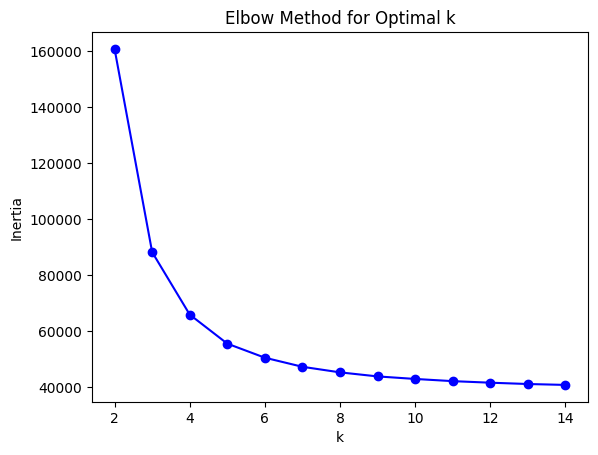

In [42]:
inertia = []
K = range(2, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(ndf)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی
</font>
</h2>



In [67]:
K = 6
kmeans = KMeans(n_clusters=K, random_state=42).fit(ndf)
distances = np.linalg.norm(ndf - kmeans.cluster_centers_[kmeans.labels_], axis=1)
threshold = np.mean(distances) + 2*np.std(distances)
prediction = (distances > threshold).astype(int)


prediction

array([0, 0, 0, ..., 0, 0, 0], shape=(45900,))

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 پیش‌بینی برای داده تست و خروجی
</font>
</h2>


In [68]:
submission = pd.DataFrame({"prediction": prediction})

submission.prediction.value_counts() / len(submission)

prediction
0    0.970937
1    0.029063
Name: count, dtype: float64

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) در غیر این صورت، در پایان مسابقه نمره شما به صفر تغییر خواهد کرد.
    <br>
    همچنین اگر از کولب برای اجرای این فایل نوت‌بوک استفاده می‌کنید، قبل از ارسال فایل <code>result.zip</code>، آخرین نسخه‌ی نوت‌بوک خود را دانلود کرده و داخل فایل ارسالی قرار دهید.
</font>

In [69]:
import zipfile
import joblib
import os

if not os.path.exists(os.path.join(os.getcwd(), 'notebook.ipynb')):
    %notebook -e notebook.ipynb

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile(f"result-k{K}.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

submission.to_csv('submission.csv', index=False)
file_names = ['notebook.ipynb', 'submission.csv']
compress(file_names)

File Paths:
['notebook.ipynb', 'submission.csv']
